# Symbolisches Rechnen mit SymPy

[SymPy](http://www.sympy.org) ist eine Bibliothek für symbolisches Rechnen in Python.

## Variablen und symblische Ausdrücke

Als allererste Zutat für symblische Ausdrücke müssen Variablen definiert werden.
Hierfür gibt es entweder die einfache `from sympy.abc import x` Variante,
oder über die `sympy.symbols` Funktion werden Name(n) und eventuell spezielle Abschätzungen ("ganzzahlig", ...) festgelegt.

In [1]:
from __future__ import division
import sympy as sy

In [2]:
from sympy.abc import x, y

In [3]:
type(x)

sympy.core.symbol.Symbol

Ein einfacher, erster Ausdruck:

In [4]:
x + y

x + y

... und dessen Typ ist (ein wenig überraschend?) `Add`.

In [5]:
type(x + y)

sympy.core.add.Add

Das liegt daran, dass ein symbolischer Ausdruck ein Baum von Operationen mit Argumenten ist.
Die Wurzel ist in diesem Fall die Addition, und die beiden Variablen sind die Argumente der Addition.

Zusammensetzung eines anderen, größeren Ausdrucks:

In [6]:
(2*x**2 + 3) / (y + 5)

(2*x**2 + 3)/(y + 5)

Zuweisung an eine Variable und Auswertung durch Substitution:

In [7]:
ex1 = (2*x**2 + 3) / (y + 5)
ex1.subs(x, 21)

885/(y + 5)

In [8]:
ex1.subs({x : 11, y : 3.14})

30.0982800982801

`.evalf()` wertet Ausdrücke numerisch aus:

In [9]:
from sympy import pi, sin, sqrt
ex2 = sqrt(2 * sin(x)) / pi
ex2

sqrt(2)*sqrt(sin(x))/pi

In [10]:
ex2.evalf(subs = {x : 1})

0.412937855327941

In [11]:
ex2.evalf(100, subs = {x : 1})

0.4129378553279408383569413918993854348289426830297614114255099495993100683862339505790006113904633237

Sympy's "`srepr`" Funktion zeigt den Aufbau des Ausdrucks als Komposition aller Funktionen an:

In [12]:
sy.srepr(ex1)

"Mul(Add(Mul(Integer(2), Pow(Symbol('x'), Integer(2))), Integer(3)), Pow(Add(Symbol('y'), Integer(5)), Integer(-1)))"

### 2D-Text Darstellung

Der Ausdruck wird in [ASCII-Art](http://en.wikipedia.org/wiki/ASCII_art) umgewandelt.

In [13]:
sy.pprint(ex1)

   2    
2⋅x  + 3
────────
 y + 5  


### LaTeX Konvertierung und Darstellung

Sympy's `latex()` Funktion konvertiert den Ausdruck zu einem entsprechenden LaTeX-Formel string.
Anschließend zeigt die `Math()` Funktion von IPython diese LaTeX Formel hier im Notebook an.

In [14]:
sy.latex(ex1)

'\\frac{2 x^{2} + 3}{y + 5}'

In [15]:
from IPython.display import Math
Math(sy.latex(ex1))

## IPython Notebook Support für SymPy Ausdrücke

Durch einmaliges Ausführen von `init_printing()` werden alle SymPy Ausdrücke automatisch in $\LaTeX{}$ dargestellt.

In [16]:
from sympy import init_printing
init_printing()

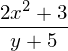

In [17]:
ex1

### Grafische Darstellung

Den Baum des symbolischen Ausdruckt kann man auch grafisch Darstellen.
Zuerst konvertiert `dotprint` den Ausdruck in das `dot`-Format zur Visualisierung von Graphen,
und dann wird es mit dem passenden Linux Utility gerendert und dargestellt.

In [18]:
def expr_to_dotgraph(name, expr):
    from sympy.printing.dot import dotprint

    # input and output filenames
    import os
    fname = os.path.join("res", name)
    fname_dot = fname + ".dot"
    fname_svg = fname + ".svg"

    # writing the output of dotprint to the given file
    with open(fname_dot, "w") as dot_file:
        dot_file.write(dotprint(expr))

    # rendering the *.dot to *.svg
    ! dot -Tsvg -o $fname_svg $fname_dot

    # showing the resulting *.svg file here in the notebook
    from IPython.display import SVG
    return SVG(filename = fname_svg)

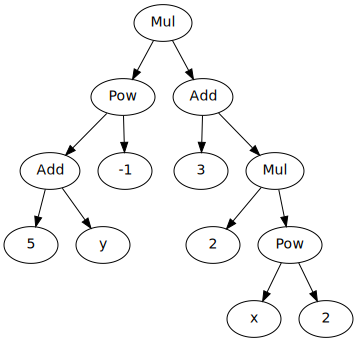

In [19]:
expr_to_dotgraph("sympy-ex1", ex1)

## Spezielle Variablen

**Ganzzahlig:** $i \in \mathbb{Z}$:

In [20]:
i = sy.symbols("i", integer=True)
i.is_integer

True

In [21]:
(3*i + 1).is_integer

True

In [22]:
print(i.is_nonnegative)

None


**Reel und nicht negativ**: $t \in\mathbb{R}\;\bigwedge\;t \geq 0$

In [23]:
t = sy.symbols("t", real=True, nonnegative=True)
print((3*t).is_nonnegative)

True


In [24]:
print(t.is_real)

True


In [25]:
print((i * t).is_integer)

None


In [26]:
# squared value plus non-negative variable is non-negative
print((i**2 + t).is_nonnegative)

True


## Manipulieren eines Ausdrucks

Hiervon gibt es verschiedene Varianten, je nach dem welche Art der Vereinfachung vorgenommen werden soll. 

* `.simplify()`: probiert intern einige Varianten, bewertet die Verbesserungen (wenn vorhanden), und sucht die beste aus.
* `.expand()`: Ausmultiplizieren, ...
* `.collect(<variable>)`: Herausziehen eines oder mehrerer Faktoren bzw. Subausdrücke
* `.factor()`: Faktorisieren
* `.cancel()`: Kürzen
* `.trigsimp()`: Trigonometrische Formeln
* usw. [siehe Dokumentation](http://docs.sympy.org/latest/tutorial/simplification.html)

In [27]:
ex2 =  (1 - x) * (4 + 5 * x) * (1 + x)
ex2

In [28]:
ex3 = ex2.expand()
ex3

In [29]:
ex3.factor()

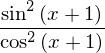

In [30]:
ex5 = sy.sin(1 + x)**2 / sy.cos(1+x)**2
ex5

In [31]:
ex5.trigsimp()

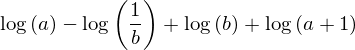

In [32]:
a, b = sy.symbols('a b', positive=True)
ex6 = sy.log(a) + sy.log(b) + sy.log(1 + a) - sy.log(1/b)
ex6

In [33]:
ex6.simplify()

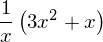

In [34]:
ex7 = (3*x**2 + x) / x
ex7

In [35]:
ex7.cancel()

In [36]:
ex8 = a*sy.log(x) + b*sy.cos(3*x) + t * sy.log(x)
ex8

In [37]:
ex8.collect(sy.log(x))

## Gleichungen

Die Gegenüberstellung zweier Ausdrücke ergibt eine Gleichung. 
SymPy ist hier etwas unfreundlich und verlangt die Verwendung des `sympy.Eq` Operators.

In [38]:
eq1 = sy.Eq(3 * x, 9 * x**2 - 2*x - 1)
eq1

Linke- und Rechte-Seite mittels `.lhs` und `.rhs`:

In [39]:
eq1.rhs

... was wieder einen Ausdruck (siehe oben) liefert, in dem z.B. Substituiert werden kann.

In [40]:
eq1.lhs.subs({x : 42})

## Lösen von Gleichungen: `solve`

Eine der Standardanwendungen symbolischer Software is das symbolische Lösen von Gleichungen bzw. Gleichungssystemen.

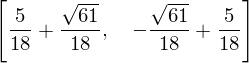

In [41]:
eq1_sol = sy.solve(eq1)
eq1_sol

Lösung 1 einsetzen:

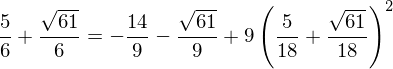

In [42]:
eq1_sol1 = eq1.subs({x:eq1_sol[0]})
eq1_sol1

In [43]:
eq1_sol1.expand()

Ein ganzes Gleichungssystem lösen.
(Die rechte Seite nach links brinen erspart den Aufruf von `Eq( ... )`)

In [44]:
from sympy.abc import x, y, z

eqn3 = [2 * x**2 - y            - 2,
        3 * x    - y      - z   + 4,
            x    + y      - z   + 8]

sol3 = sy.solve(eqn3)

for sol in sol3:
    subsol = [e.subs(sol).simplify() for e in eqn3]
    print("%-30s -> eingesetzt: %s" % (sol, subsol))

{x: 0, z: 6, y: -2}            -> eingesetzt: [0, 0, 0]
{x: 1/2, z: 7, y: -3/2}        -> eingesetzt: [0, 0, 0]


## Differentialgleichungen

Der fundamentale Unterschied zu normalen Gleichungen ist,
dass es symbolische Variablen für Funktionen gibt: $f$, $g$, ...
Diese werden mit der `symbols` Funktion erzeugt,
deren `cls` (Klasse) auf `Function` gesetzt wird,
bzw. das Argument `function = True` angegeben wird.
Dadurch lässt sich eine Funktion $f(x)$ ganz allgemein in Python durch `f(x)` konstruieren.

In [45]:
from sympy import symbols, Function, Eq
f = symbols("f", cls=Function)
f(x)

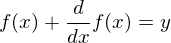

In [46]:
dgl1 = Eq(f(x) + f(x).diff(x), y)
dgl1

In [47]:
from sympy import dsolve
dsolve(dgl1, f(x))

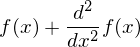

In [48]:
dgl2 = f(x).diff(x, x) + f(x)
dgl2

In [49]:
dsolve(dgl2, f(x))

## Ungleichungen

Ähnlich zu Gleichungen, [können auch Ungleichungen behandelt werden](http://docs.sympy.org/latest/modules/solvers/inequalities.html).

In [50]:
from sympy.solvers.inequalities import solve_univariate_inequality
from sympy import symbols

In [51]:
x = symbols("x", real=True)

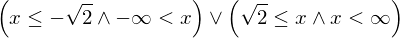

In [52]:
solve_univariate_inequality(x**2 + 1 >= 3, x)

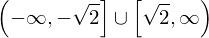

In [53]:
solve_univariate_inequality(x**2 + 1 >= 3, x, relational=False)

In [54]:
from sympy import sin
solve_univariate_inequality(sin(x) > 0.5, x, relational=False)

## Diophantische Gleichungen

Das Ziel ist, eine Gleichung $f(x_1,\,x_2,\,\dots,\,x_n) = 0$ mit $n \geq 2$ vielen Variablen $x_i \in \mathbb{Z}$ zu lösen.
Siehe [hier](http://docs.sympy.org/latest/modules/solvers/diophantine.html)

In [55]:
from sympy.solvers.diophantine import diophantine
from sympy import symbols
a, b = symbols("a, b", integer=True)

In [56]:
diophantine(2 * a + b)

In [57]:
diophantine(2 * a + 3 * b**2 - 10)

## Limes

Die Definition des Limes: 
    
$$\lim_{x\to a}f(x)=L \; \text{iff} \; \forall\; \epsilon>0\; \exists\; \delta \; \text{such that} \; \forall\; x: |x-a|<\delta \Rightarrow |f(x)-L|\leq \epsilon $$

In [58]:
from sympy import limit
from sympy.abc import x

In [59]:
f = (3 * x**3) / (1 - 2*x**2 + x**3)

Numerische Approximation

`f.subs(<variable>, <wert>)` substituiert hier die angegebene Variable mit dem gegebenen Wert;
und `.evalf()` wertet den Ausdruck aus.

In [60]:
for x_val in range(1000, 20000, 1000):
    fx = f.subs(x, x_val).evalf()
    print("%7d -> %14.11f" % (x_val, fx))

   1000 ->  3.00601202104
   2000 ->  3.00300300263
   3000 ->  3.00200133411
   4000 ->  3.00150075033
   5000 ->  3.00120048017
   6000 ->  3.00100033343
   7000 ->  3.00085738782
   8000 ->  3.00075018754
   9000 ->  3.00066681484
  10000 ->  3.00060012002
  11000 ->  3.00054555373
  12000 ->  3.00050008335
  13000 ->  3.00046160948
  14000 ->  3.00042863266
  15000 ->  3.00040005334
  16000 ->  3.00037504688
  17000 ->  3.00035298270
  18000 ->  3.00033337037
  19000 ->  3.00031582272


*Bemerkung:* SymPy's `oo` steht für $\infty$

In [61]:
from sympy import oo
limit(f, x, oo)

In [62]:
limit(f, x, -oo)

In [63]:
limit(f, x, 0)

Dies ist auch mit mehrstelligen Funktionen machbar:

In [64]:
from sympy import sin
from sympy.abc import x, y
f2 = (sin(x) + x**2 * y**2 - x**3 * y**3) / (1 - x - 2 * (x + 2 * y)**3)

In [65]:
limit(f2, x, oo)

In [66]:
limit(f2, y, oo)

Bei Polstellen ist es wichtig, von welcher Seite der Limes angegangen wird:

In [67]:
f_pol = 1 / (-27 + x**3)

In [68]:
limit(f_pol, x, 3, dir="+")

In [69]:
limit(f_pol, x, 3, dir="-")

## Reihenentwicklung

Ein Ausdruck wird an einem bestimmten Punkt entwickelt.

In [70]:
from sympy import sin
from sympy.abc import x

In [71]:
f3 = sin(x) * x
f3

An der Stelle $x_0 = 0$ mit 10 Gliedern:

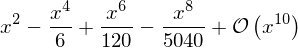

In [72]:
f3_series_0 = f3.series(x = x, x0 = 0, n = 10)
f3_series_0

An der Stelle $x_0 = \pi$ mit 5 Gliedern:

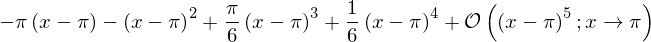

In [73]:
f3_series_pi = f3.series(x = x, x0 = sy.pi, n = 5)
f3_series_pi

In [74]:
f3_series_pi.expand()

## Integral

Sympy kann bestimmte und unbestimmte Integrale berechnen.

In [75]:
from sympy import integrate, cos, pi, exp
from sympy.abc import x

integrate((1 - x**2) * cos(x), x)

In [76]:
from sympy.abc import t
integrate((1 - x**2) * cos(x), (x, -pi, pi))

In [77]:
from sympy.abc import y
exp2 = exp(-x**2) * exp(-y**2)
exp2.simplify()
exp2

Integral der Funktion $\operatorname{exp2}(x,\,y)$ nach $y$

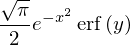

In [78]:
integrate(exp2, y)

Bestimmtes Integral:

$$\int_{-\infty}^{\infty}\!\int_{-\infty}^{\infty}\!\!\operatorname{exp2}(x,\,y)\,\mathrm{d}x = ?$$

In [79]:
from sympy import oo
integrate(exp2, (x, -oo, oo), (y, -oo, oo))

## Unausgewertete Ausdrücke

Viele der bislang vorgestellten Funktionen haben äquivalent dazu Kontruktoren für Ausdrücke.
Diese können wie gehabt dargestellt werden,
es sind Substitutionen möglich,
und werden mit der `.doit()` Methode ausgewertet.

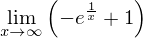

In [80]:
from sympy import exp, Limit, latex, oo
from sympy.abc import x

limit_expr = Limit(1 - exp(1 / x), x, oo)
limit_expr

In [81]:
limit_expr.doit()

In [82]:
from sympy import Integral
from sympy.abc import y

int_expr = Integral(1 / y, x)
int_expr = int_expr.subs(y, exp(1/x))

Math(latex(int_expr) + "=" + latex(int_expr.doit()))

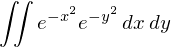

In [83]:
Integral(exp2, x, y)

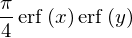

In [84]:
Integral(exp2, x, y).doit()

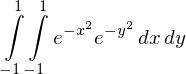

In [85]:
exp2_i2 = Integral(exp2, (x, -1, 1), (y, -1, 1))
exp2_i2

In [86]:
exp2_i2.doit()

In [87]:
exp2_i2.doit().evalf()

Der interne Graph des Integralausdrucks `int_expr`:

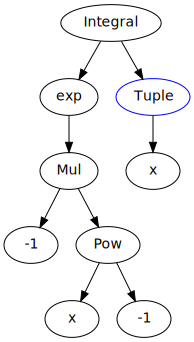

In [88]:
expr_to_dotgraph("sympy-int", int_expr)